In [1]:
!pip install opendatasets --upgrade --quiet


In [3]:
# get the data from
import opendatasets as od

dataset_url = 'https://www.kaggle.com/datasets/shaunthesheep/microsoft-catsvsdogs-dataset'
od.download(dataset_url)

#https://www.kaggle.com/datasets/preetviradiya/brian-tumor-dataset  >>> this is our original dataset
#https://www.kaggle.com/datasets/sartajbhuvaji/brain-tumor-classification-mri >>> this dataset have many types of tumor
#https://www.kaggle.com/datasets/ahmedhamada0/brain-tumor-detection  >>> this dataset have three folders 1. no 2. pred 3.yes
#https://www.kaggle.com/datasets/kylegraupe/skin-cancer-binary-classification-dataset   >>> this dataset have bainary class

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: muhammadikhalas
Your Kaggle Key: ··········


100%|██████████| 788M/788M [00:22<00:00, 36.7MB/s]


In [4]:

import numpy as np
import matplotlib.pyplot as plt
import os
import math
import shutil
import glob

In [5]:
ROOT_DIR = "/content/microsoft-catsvsdogs-dataset/PetImages"
number_of_images = {}

for dir in os.listdir(ROOT_DIR):
    number_of_images[dir] = len(os.listdir(os.path.join(ROOT_DIR, dir)))



In [6]:
number_of_images.items()


dict_items([('Cat', 12501), ('Dog', 12501)])

In [7]:
def dataFolder(p, split):
  # we will create a train folder

  if not os.path.exists("./"+p):
    os.mkdir("./"+p)

    for dir in os.listdir(ROOT_DIR):
     os.makedirs("./"+p+"/"+dir)

     for img in np.random.choice(a = os.listdir(os.path.join(ROOT_DIR, dir)),
                                size = (math.floor(split*number_of_images[dir])-10),
                                replace=False):
       O = os.path.join(ROOT_DIR, dir, img) #path
       D = os.path.join("./"+p,dir)
       shutil.copy(O,D)
       os.remove(O)

  else:
    print(f"{p} Folder exsist")


In [8]:
dataFolder("train", 0.8)


In [9]:
dataFolder("test", 0.20)

In [13]:
# Look into the data directory
data_dir = '/content/cat-vs-dog'
print(os.listdir(data_dir))
classes = os.listdir(data_dir + '/train')
print(classes)

['train', 'test']
['Cat', 'Dog']


In [ ]:
#!rm -r "/content/skin-cancer-binary-classification-dataset"

In [14]:
import os

import torch

import torchvision

import tarfile

import torch.nn as nn

import numpy as np

import torch.nn. functional as F

from torchvision.datasets.utils import download_url

from torchvision.datasets import ImageFolder

from torch.utils.data import DataLoader

import torchvision.transforms as tt

from torch.utils.data import random_split

from torchvision.utils import make_grid

import matplotlib

import matplotlib.pyplot as plt

%matplotlib inline

matplotlib.rcParams['figure.facecolor'] = '#ffffff'

In [15]:
from torchvision.transforms import RandomCrop, RandomHorizontalFlip, ToTensor
from PIL import ImageEnhance
class PreprocessImage:
    def __call__(self, img):
        if img.mode != 'RGB':
            img = img.convert('RGB')

        enhancer = ImageEnhance.Brightness(img)
        img = enhancer.enhance(2)

        img = ImageOps.equalize(img)
        img = img.resize((224, 224))
        img = np.array(img)
        img = img / 255.0

        return img


# For train data augmentation
train_tfms = tt.Compose([
    RandomCrop(32, padding=4, padding_mode='reflect'),
    RandomHorizontalFlip(),
    PreprocessImage(),
    ToTensor()
])

valid_tfms = tt.Compose([
    PreprocessImage(),
    ToTensor()
])


# For validation data (no augmentation)
valid_tfms = tt.Compose([
    PreprocessImage(),
    ToTensor()
])



In [16]:
# PyTorch datasets
train_ds = ImageFolder(data_dir+ '/train', train_tfms)
valid_ds = ImageFolder(data_dir+'/test',valid_tfms)

In [17]:
len(train_ds)


19978

In [18]:
import torchvision
from torchvision import transforms
image_size = (500, 500)

train_transform = transforms.Compose([
  transforms.ToTensor(), transforms.RandomRotation (degrees=15),
  transforms.Resize(size=image_size),
 ])

test_transform= transforms.Compose([transforms.ToTensor(),
                                    transforms.Resize(size = image_size),
                                    ])

#transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.2251])

In [19]:
# PyTorch datasets
train_ds = ImageFolder(data_dir+ '/train', train_transform)
valid_ds = ImageFolder(data_dir+'/test',test_transform)

In [20]:
from torchvision.transforms import Resize
from torch.utils.data import default_collate

def custom_collate(batch):
    # Resize images to a consistent size (e.g., 32x32)
    resize_transform = Resize((64, 64), antialias=True)
    images, labels = zip(*batch)
    images = [resize_transform(image) for image in images]
    return default_collate(list(zip(images, labels)))


In [21]:
batch_size = 30

train_dl = DataLoader(train_ds, batch_size, shuffle=True, num_workers=4, collate_fn=custom_collate)
valid_dl = DataLoader(valid_ds, batch_size, num_workers=4, collate_fn=custom_collate)



/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


In [22]:
def show_batch(dl):
  for images, labels in dl:
    fig, ax = plt.subplots(figsize=(12,6))
    ax.set_xticks([]); ax.set_yticks([])
    ax.imshow(make_grid(images[:10],nrow=4).permute(1,2,0))      # permute>>> change the colorchannel position to the last one.
    break

/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across th

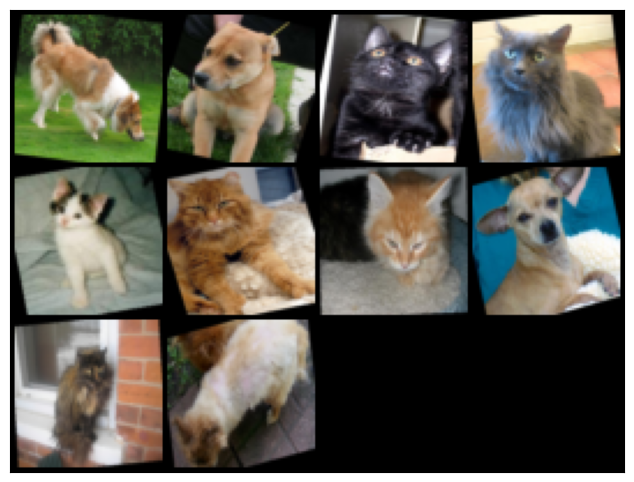

In [23]:
show_batch(train_dl)

In [24]:
def get_default_device():
  """ Pick GPU if available, else CPU"""
  if torch.cuda.is_available():
    return torch.device('cuda')
  else:
    return torch.device('cpu')

def to_device(data, device):
  """Move tensor(s) to chosen device"""
  if isinstance(data, (list, tuple)):
    return [to_device(x, device) for x in data]
  return data.to(device, non_blocking=True)

class DeviceDataLoader():
  """Wrap a dataloader to move data to a device"""
  def __init__(self, dl, device):
    self.dl = dl
    self.device=device

  def __iter__(self):
    """Yield a batch of data after moving it to device"""
    for b in self.dl:
      yield to_device(b, self.device)

  def __len__(self):
    """Number of batches"""
    return len(self.dl)

In [25]:
device = get_default_device()
device

device(type='cuda')

In [26]:
train_dl = DeviceDataLoader(train_dl, device)
valid_dl = DeviceDataLoader(valid_dl, device)


In [27]:
class SimpleResidualBlock(nn.Module):
  def __init__(self):
    super().__init__()
    self.conv1 = nn.Conv2d(in_channels=3, out_channels=3, kernel_size=3, stride=1, padding=1)
    self.relu1 = nn.ReLU()
    self.conv2 = nn.Conv2d(in_channels=3, out_channels=3, kernel_size=3, stride=1, padding=1)
    self.relu2 = nn.ReLU()

  def forward(self, x):
    out = self.conv1(x)
    out = self.relu1(out)
    out = self.conv2(x)
    return self.relu2(out) + x  # ReLU can applied before or after adding the initial value of x


simple_resnet = to_device(SimpleResidualBlock(), device)

for images, labels in train_dl:
    images = images.to(device, dtype=torch.float32)  # Convert input to float32
    print(images.shape)
    out = simple_resnet(images)
    print(out.shape)
    break

del simple_resnet, images, labels
torch.cuda.empty_cache()


/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across th

torch.Size([30, 3, 64, 64])
torch.Size([30, 3, 64, 64])


In [28]:
def accuracy(outputs, labels):
  _, preds = torch.max(outputs, dim=1)
  return torch.tensor(torch.sum(preds == labels).item() / len(preds))

class ImageClassifictionBase(nn.Module):
  def training_step(self , batch):
    images, labels = batch

    # Cast images and labels to the appropriate data type and move them to the device
    images = images.to(device, dtype=torch.float32)  # Assuming you want float32
    labels = labels.to(device, dtype=torch.long)  # Assuming labels are of type long

    out = self(images)  # Generate predictions
    loss = F.cross_entropy(out, labels)  # Calculate loss
    return loss

  def validation_step(self, batch):
    images, labels = batch

    # Cast images and labels to the appropriate data type and move them to the device
    images = images.to(device, dtype=torch.float32)  # Assuming you want float32
    labels = labels.to(device, dtype=torch.long)  # Assuming labels are of type long

    out = self(images)  # Generate predictions

    loss = F.cross_entropy(out, labels)  # Calculate loss

    # Calculate accuracy
    _, preds = torch.max(out, dim=1)
    acc = torch.tensor(torch.sum(preds == labels).item() / len(preds))

    return {'val_loss': loss, 'val_acc': acc}



  def validation_epoch_end(self, outputs):
    batch_losses = [x['val_loss'] for x in outputs]
    epoch_loss = torch.stack(batch_losses).mean()     # combine losses
    batch_accs = [x['val_acc'] for x in outputs]
    epoch_acc = torch.stack(batch_accs).mean()        # combine accuracies
    return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}

  def epoch_end(self, epoch, result):
    print("Epoch [{}], train_loss: {:.4f},  val_loss: {:.4f}, val_acc: {:.4}".format(epoch, result['train_loss'], result['val_loss'], result['val_acc']))


In [29]:
def conv_block(in_channels, out_channels, pool=False):
  layers = [nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1),
            nn.BatchNorm2d(out_channels),
            nn.ReLU(inplace=True)]
  if pool: layers.append(nn.MaxPool2d(2))
  return nn.Sequential(*layers)

class ResNet9(ImageClassifictionBase):
  def __init__(self, in_channels, num_classes):
    super().__init__()
    # 3 , 32, 32
    self.conv1 = conv_block(in_channels, 64)  # 64, 32 ,32 / 64
    self.conv2 = conv_block(64, 128, pool=True) # 128, 16,16  / 32
    self.res1 = nn.Sequential(conv_block(128, 128), conv_block(128, 128))


    self.conv3 = conv_block(128, 256, pool=True) # 256, 8, 8  / 16
    self.conv4 = conv_block(256, 256, pool=True) # 512, 4, 4  / 8
    self.conv5 = conv_block(256, 512, pool=True)  # 4
    self.res2 = nn.Sequential(conv_block(512, 512), conv_block(512, 512))


    self.classifier = nn.Sequential(nn.MaxPool2d(4), # 512, 1, 1
                                    nn.Flatten(),    # 512
                                    nn.Linear(512, num_classes))

  def forward(self, xb):
    out = self.conv1(xb)
    out = self.conv2(out)
    out = self.res1(out) + out
    out = self.conv3(out)
    out = self.conv4(out)
    out = self.conv5(out)
    out = self.res2(out) + out
    out = self.classifier(out)
    return out



In [30]:
model = to_device(ResNet9(3, 2), device)
model = to_device(model, device)

model

ResNet9(
  (conv1): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
  )
  (conv2): Sequential(
    (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (res1): Sequential(
    (0): Sequential(
      (0): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
    )
    (1): Sequential(
      (0): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=Tr

In [31]:
@torch.no_grad()
def evaluate(model, val_loader):
  """Evaluate the model's performance on the validation set"""
  model.eval()
  outputs = [model.validation_step(batch) for batch in val_loader]
  return model.validation_epoch_end(outputs)


def get_lr(optimizer):
  for param_group in optimizer.param_groups:
    return param_group['lr']



def fit_one_cycle(epochs, max_lr, model, train_loader, val_loader, weight_decay=0, grad_clip=None, opt_func=torch.optim.SGD):
  """Train the model using gradient descent"""
  torch.cuda.empty_cache()     # to clear the cache
  history=[]
  # set up custom optimizer with weight decay
  optimizer = opt_func(model.parameters(), max_lr, weight_decay=weight_decay)
  # set up one-cycle learning rate scheduler
  sched = torch.optim.lr_scheduler.OneCycleLR(optimizer, max_lr, epochs=epochs, steps_per_epoch=len(train_loader))
  for epoch in range(epochs):
    #Training Phase
    model.train()
    train_losses = []
    lrs = []
    for batch in train_loader:
      loss = model.training_step(batch)
      train_losses.append(loss)
      loss.backward()

      # gradient clipping
      if grad_clip:
        nn.utils.clip_grad_value_(model.parameters(), grad_clip)

      optimizer.step()
      optimizer.zero_grad()

      # record & update learning rate
      lrs.append(get_lr(optimizer))
      sched.step()

    # Validation phase
    result = evaluate(model, val_loader)
    result['train_loss']=torch.stack(train_losses).mean().item()
    result['lrs']=lrs
    model.epoch_end(epoch, result)
    history.append(result)
  return history

In [32]:
history = [evaluate(model, valid_dl)]
history

/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across th

[{'val_loss': 0.6931909322738647, 'val_acc': 0.5}]

In [33]:
epochs = 1
max_lr = 0.001
grad_clip = 0.1
weight_decay = 1e-4
opt_func = torch.optim.Adam


In [36]:
%%time
history += fit_one_cycle(epochs, max_lr, model, train_dl, valid_dl,
                         grad_clip= grad_clip,
                         weight_decay=weight_decay,
                         opt_func=opt_func)

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - P

UnidentifiedImageError: ignored

In [37]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import sklearn
from sklearn.metrics import accuracy_score

# Assuming you have true labels (y_true) and predicted labels (y_pred)
accuracy = accuracy_score(y_true, y_pred)

# Print the accuracy
print(f"Test Accuracy: {accuracy * 100:.2f}%")

NameError: ignored

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
model_save_path = '/content/drive/MyDrive/BrainTumorModel/brain_tumor96.pth'


In [ ]:
# Assuming 'model' is your trained model
torch.save(model.state_dict(), model_save_path)


In [ ]:
# Define and move the model to the device
model = to_device(ResNet9(3, 2), device)

# Load the model state dictionary
model.load_state_dict(torch.load(model_save_path))

# Set the model to evaluation mode
model.eval()


ResNet9(
  (conv1): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
  )
  (conv2): Sequential(
    (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (res1): Sequential(
    (0): Sequential(
      (0): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
    )
    (1): Sequential(
      (0): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=Tr

In [ ]:
def plot_lrs(history):
  lrs = np.concatenate([x.get('lrs', []) for x in history])
  plt.plot(lrs)
  plt.xlabel('Batch No.')
  plt.ylabel('Learning rate')
  plt.title('Learning Rate vs. Batch no.')

In [ ]:
!pip install scikit-image



In [ ]:
def highlight_tumor(image):
    # Convert the image to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

    # Apply adaptive thresholding
    _, thresholded_image = cv2.threshold(gray_image, 200, 255, cv2.THRESH_BINARY)

    # Convert the thresholded image to CV_8UC1 format
    thresholded_image = cv2.convertScaleAbs(thresholded_image)

    # Find contours in the thresholded image
    contours, _ = cv2.findContours(thresholded_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Initialize an empty mask for the tumor region
    tumor_mask = np.zeros_like(thresholded_image, dtype=np.uint8)

    # Iterate over the contours and draw the tumor region
    cv2.drawContours(tumor_mask, contours, -1, (255), thickness=cv2.FILLED)

    # Create an RGB mask with green color
    green_mask = np.zeros_like(image)
    green_mask[..., 1] = 255

    # Combine the original image with the green mask based on the tumor mask
    highlighted_image = np.where(tumor_mask[..., None], image + green_mask, image)

    return highlighted_image, tumor_mask


In [ ]:
def predict_and_highlight_tumor(img, model):
    xb = to_device(img.unsqueeze(0), device)
    yb = model(xb)
    _, preds = torch.max(yb, dim=1)

    # Retrieve the class label
    predicted_class = train_ds.classes[preds[0].item()]

    # If the prediction is "Brain Tumor"
    if predicted_class == "Brain Tumor":
        # Convert the image tensor to a NumPy array
        img_np = img.permute(1, 2, 0).cpu().numpy()

        # Highlight the tumor region
        highlighted_image, tumor_mask = highlight_tumor(img_np)

        # Display the original, highlighted image, and tumor mask
        import matplotlib.pyplot as plt

        plt.subplot(1, 3, 1)
        plt.imshow(img.permute(1, 2, 0).clamp(0, 1))
        plt.title('Original Image')
        plt.axis('off')

        plt.subplot(1, 3, 2)
        plt.imshow(highlighted_image)
        plt.title('Highlighted Tumor')
        plt.axis('off')

        plt.subplot(1, 3, 3)
        plt.imshow(tumor_mask, cmap='gray')
        plt.title('Tumor Mask')
        plt.axis('off')

        plt.show()

    return predicted_class


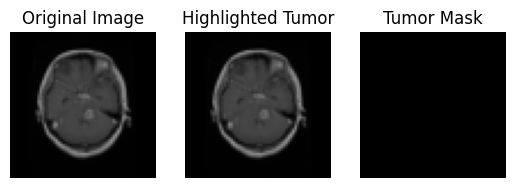

'Brain Tumor'

In [ ]:
# Assuming you have 'img' as the image tensor
img, label = valid_ds[400]  # Load an image from your dataset
img = test_transform(img)
predicted_class = predict_and_highlight_tumor(img, model)

predicted_class

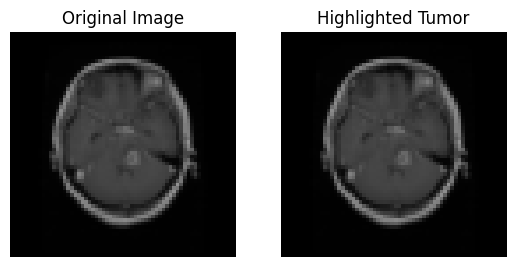

'Brain Tumor'

In [ ]:
from torchvision.transforms import Resize
import cv2

# Assuming you have defined a test_transform earlier
test_transform = transforms.Compose([
    transforms.ToPILImage(),
    transforms.ToTensor(),
    Resize((64, 64), antialias=True),
])


from skimage import measure

def highlight_tumor(image):
    # Convert the image to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

    # Apply adaptive thresholding
    _, thresholded_image = cv2.threshold(gray_image, 200, 255, cv2.THRESH_BINARY)

    # Find contours in the thresholded image
    contours = measure.find_contours(thresholded_image, 0.8, fully_connected='high')

    # Initialize an empty mask for the tumor region
    tumor_mask = np.zeros_like(thresholded_image, dtype=np.uint8)

    # Iterate over the contours and mark the tumor region
    for contour in contours:
        rr, cc = contour[:, 0].astype(int), contour[:, 1].astype(int)
        tumor_mask[rr, cc] = 1

    # Create an RGB mask with green color
    green_mask = np.zeros_like(image)
    green_mask[..., 1] = 255

    # Combine the original image with the green mask based on the tumor mask
    highlighted_image = np.where(tumor_mask[..., None], image + green_mask, image)

    return highlighted_image






def predict_and_highlight_tumor(img, model):
    xb = to_device(img.unsqueeze(0), device)
    yb = model(xb)
    _, preds = torch.max(yb, dim=1)

    # Retrieve the class label
    predicted_class = train_ds.classes[preds[0].item()]

    # If the prediction is "Brain Tumor"
    if predicted_class == "Brain Tumor":
        # Convert the image tensor to a NumPy array
        img_np = img.permute(1, 2, 0).cpu().numpy()

        # Highlight the tumor region
        highlighted_image = highlight_tumor(img_np)

        # Display the original and highlighted images
        import matplotlib.pyplot as plt

        plt.subplot(1, 2, 1)
        plt.imshow(img.permute(1, 2, 0).clamp(0, 1))
        plt.title('Original Image')
        plt.axis('off')

        plt.subplot(1, 2, 2)
        plt.imshow(highlighted_image)
        plt.title('Highlighted Tumor')
        plt.axis('off')

        plt.show()

    return predicted_class


# Assuming you have 'img' as the image tensor
img, label = valid_ds[400]  # Load an image from your dataset
img = test_transform(img)
predicted_class = predict_and_highlight_tumor(img, model)

predicted_class


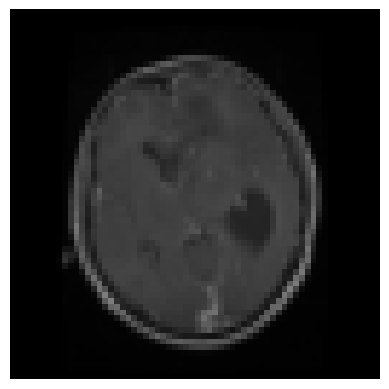

Label:  Brain Tumor , predicted:  Brain Tumor


In [ ]:
from torchvision.transforms import Resize

# Assuming you have defined a test_transform earlier
test_transform = transforms.Compose([
    transforms.ToPILImage(),
    transforms.ToTensor(),
    Resize((64, 64), antialias=True),
])

def predict_image(img, model):
   xb = to_device(img.unsqueeze(0), device)
   yb = model(xb)
   _, preds = torch.max(yb, dim=1)

   # Retrieve the class label
   return train_ds.classes[preds[0].item()]

img, label = valid_ds[400]
# Apply transformations to resize and normalize the image
img = test_transform(img)
plt.imshow(img.permute(1, 2, 0).clamp(0, 1))
plt.axis('off')
plt.show()

predicted_class = predict_image(img, model)
print('Label: ', train_ds.classes[label], ', predicted: ', predicted_class)


In [ ]:
def predict_image(img, model):

   xb = to_device(img.unsqueeze(0), device)

   yb = model(xb)

   _, preds = torch.max(yb, dim=1)


    # Retrieve the class label
   return train_ds.classes[preds[0].item()]



In [ ]:
from torchvision.transforms import Resize

# Assuming you have defined a test_transform earlier
test_transform = transforms.Compose([
    transforms.ToPILImage(),
    transforms.ToTensor(),
    Resize((64, 64), antialias=True),

])





In [ ]:
img, label = valid_ds[600]
# Apply transformations to resize and normalize the image
img = test_transform(img)
plt.imshow(img.permute(1, 2, 0).clamp(0, 1))
print('Label: ', train_ds.classes[label], ', predicted: ', predict_image(img, model))

TypeError: ignored

In [ ]:
for i in range(10):
    img, label = valid_ds[800 + i]  # Get the image and label
    img = test_transform(img)  # Apply transformations
    plt.imshow(img.permute(1, 2, 0).clamp(0, 1))  # Display the image
    plt.show()  # Show the image
    print('Label: ', train_ds.classes[label], ', predicted: ', predict_image(img, model))  # Print labels


<ipython-input-145-f46213372873>:6: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  transforms.Resize((64, 64), interpolation=Image.ANTIALIAS),


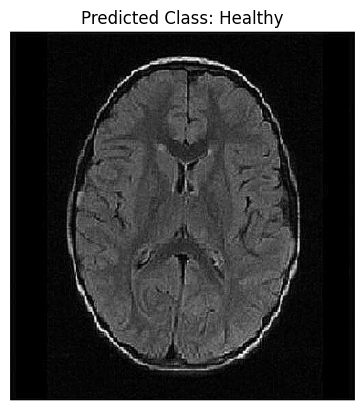

In [ ]:
from PIL import Image
import torchvision.transforms as transforms

# Define the test transformation
test_transform = transforms.Compose([
    transforms.Resize((64, 64), interpolation=Image.ANTIALIAS),
    transforms.ToTensor(),
])

def predict_image(image_path, model):
    # Load the image from file path
    img = Image.open(image_path)

    # Apply the test transformation
    img = test_transform(img)

    # Prepare the image for prediction
    xb = to_device(img.unsqueeze(0), device)
    yb = model(xb)
    _, preds = torch.max(yb, dim=1)

    # Retrieve the class label
    return train_ds.classes[preds[0].item()]

# Specify the file path of the image you want to predict
image_path = '/content/brian-tumor-dataset/Brain Tumor Data Set/Brain Tumor Data Set/Healthy/Not Cancer  (744).jpg'  # Replace with the actual file path

# Predict the class of the image
predicted_class = predict_image(image_path, model)

# Display the image and predicted class
img = Image.open(image_path)
plt.imshow(img)
plt.axis('off')
plt.title('Predicted Class: ' + predicted_class)
plt.show()
